In [1]:
import os
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [9]:
folder="../../data/output/RealWorld/"
datasets=['astroPh', 'emailEU', 'facebook', 'facebookMedium', 'gitInteractions', 'hepPh', 'lastfm', 'redditHyperlink', 'twitchDE', 'twitchENGB', 'twitchES', 'twitchFR', 'twitchPTBR', 'twitchRU']
contagions=['SimpleContagion', 'ComplexContagion']
startRatio=['01', '02', '03', '04', '05']
rs=[ 'r10', 'r20', 'r30', 'r40', 'r50', 'r60', 'r70', 'r80', 'r90']
r_dict={ "r10": 0, "r20": 0, "r30":0, "r40":0, "r50":0, "r60":0, "r70":0, "r80":0, "r90":0}
contagion_dict={'SimpleContagion':copy.deepcopy(r_dict), 'ComplexContagion':copy.deepcopy(r_dict)}
sum_dict={'astroPh':copy.deepcopy(contagion_dict), 'emailEU':copy.deepcopy(contagion_dict), 'facebook':copy.deepcopy(contagion_dict), 'facebookMedium':copy.deepcopy(contagion_dict), 'facebookArtist':copy.deepcopy(contagion_dict), 'gitInteractions':copy.deepcopy(contagion_dict), 'hepPh':copy.deepcopy(contagion_dict), 'lastfm':copy.deepcopy(contagion_dict), 'redditHyperlink':copy.deepcopy(contagion_dict), 'twitchDE':copy.deepcopy(contagion_dict), 'twitchENGB':copy.deepcopy(contagion_dict), 'twitchES':copy.deepcopy(contagion_dict), 'twitchFR':copy.deepcopy(contagion_dict), 'twitchPTBR':copy.deepcopy(contagion_dict), 'twitchRU':copy.deepcopy(contagion_dict)}
count_dict=copy.deepcopy(sum_dict)


for dataset in datasets:
    for contagion in contagions:
        file_path=folder+dataset+"/"+contagion+"/05/"
        files=os.listdir(file_path)
        for file in files:
            fl=file.split("_")
            r=fl[1]
            if r=='r0' or r=='r100':
                continue
            data=pd.read_csv(file_path+file, sep=' ')
            data=data.tail(1)
            finalVal=data.iloc[0,2]
            finalVal=float(finalVal)
            if finalVal>0.5:
                finalVal=1-finalVal

            count_dict[dataset][contagion][r]=count_dict[dataset][contagion][r]+1
            sum_dict[dataset][contagion][r]=sum_dict[dataset][contagion][r]+finalVal
        
        for rVal in rs:
            if count_dict[dataset][contagion][rVal]>0:
                sum_dict[dataset][contagion][rVal]=sum_dict[dataset][contagion][rVal]/count_dict[dataset][contagion][rVal]

print(sum_dict)

{'astroPh': {'SimpleContagion': {'r10': 0.014308523999999998, 'r20': 0.016180109999999994, 'r30': 0.02191031533333333, 'r40': 0.04560341166666668, 'r50': 0.14832437586206898, 'r60': 0.27658021428571417, 'r70': 0.4031955357142857, 'r80': 0.4581253928571429, 'r90': 0.4868687142857143}, 'ComplexContagion': {'r10': 0.007582259259259265, 'r20': 0.006331535714285721, 'r30': 0.006223107142857153, 'r40': 0.006417249999999998, 'r50': 0.007223821428571424, 'r60': 0.005011285714285714, 'r70': 0.0009874285714285716, 'r80': 0.00022835714285713532, 'r90': 0.0001974074074074013}}, 'emailEU': {'SimpleContagion': {'r10': 0.01687387083333334, 'r20': 0.020439466666666663, 'r30': 0.0247097875, 'r40': 0.02806808750000001, 'r50': 0.030638492499999993, 'r60': 0.04038145, 'r70': 0.05530684062500001, 'r80': 0.21907129166666672, 'r90': 0.391127625}, 'ComplexContagion': {'r10': 0.010944999999999996, 'r20': 0.011318125000000004, 'r30': 0.01003291666666667, 'r40': 0.007752708333333326, 'r50': 0.006508958333333338,

In [10]:
dataset_cluster=dict()
dataset_modular=dict()

with open("../../data/output/RealWorld/Cluster_Modular.txt") as f:
    lines=f.readline()
    for line in f:
        line=line.split(',')
        clu=float(line[1])
        mod=float(line[2][:-2])
        dataset_cluster[line[0]]=clu
        dataset_modular[line[0]]=mod

print(dataset_modular)
print(dataset_cluster)

{'emailEU': 0.432647287132404, 'facebook': 0.834943800919443, 'twitchENGB': 0.449791762038333, 'twitchES': 0.40788297517828, 'twitchPTBR': 0.293310081676655, 'gitInteractions': 0.451937019685353, 'redditHyperlink': 0.50822487167103, 'lastfm': 0.814553625054023, 'facebookMedium': 0.814876249354876, 'facebookArtist': 0.61231990389873, 'twitchRU': 0.3368471209665487, 'twitchDE': 0.295086630724421, 'twitchFR': 0.3414078260829035, 'hepPh': 0.656042347196741, 'astroPh': 0.627287484860742}
{'emailEU': 0.3993549664221539, 'facebook': 0.6055467186200871, 'twitchENGB': 0.13092821901472024, 'twitchES': 0.22249632592464147, 'twitchPTBR': 0.3198952746693508, 'gitInteractions': 0.16753704480107237, 'redditHyperlink': 0.18090101843790804, 'lastfm': 0.21941842432708525, 'facebookMedium': 0.3597383824426918, 'facebookArtist': 0.13812042114553524, 'twitchRU': 0.16579724241991578, 'twitchDE': 0.200885726693227, 'twitchFR': 0.22170550923594234, 'hepPh': 0.6114825236824339, 'astroPh': 0.6305932411707943}


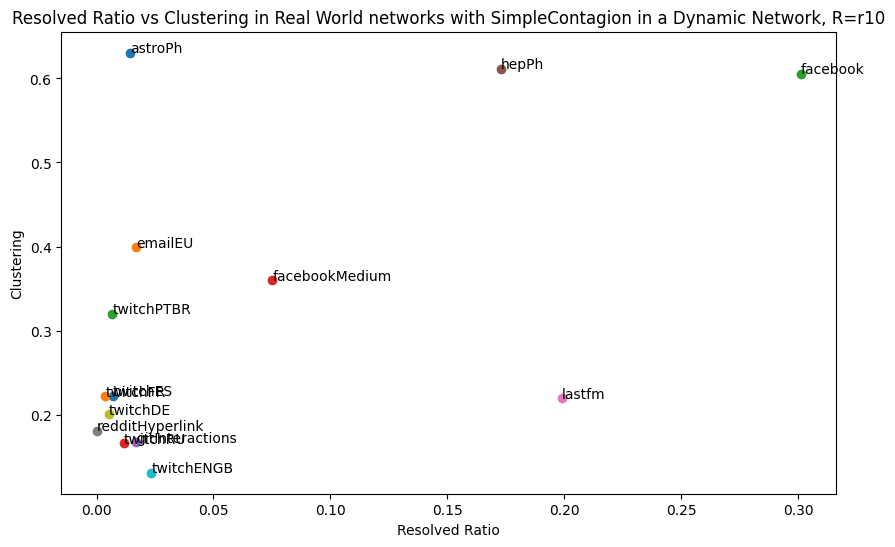

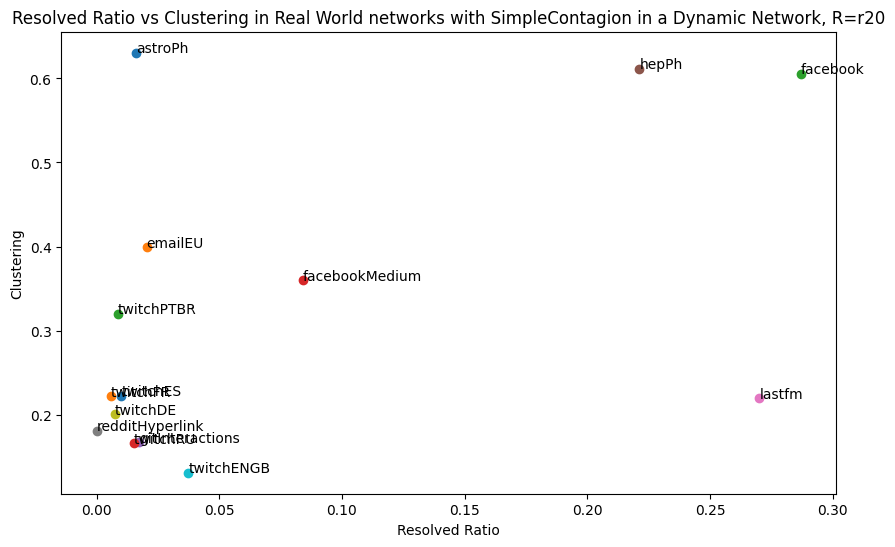

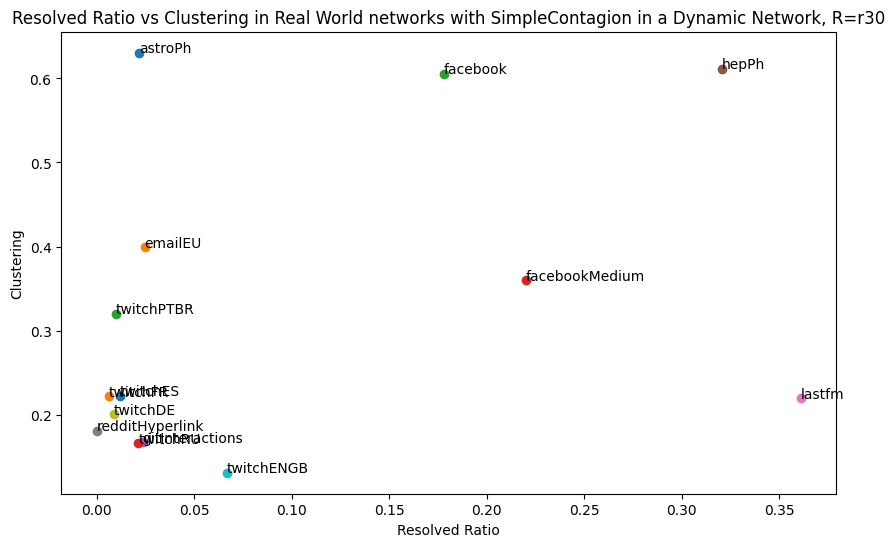

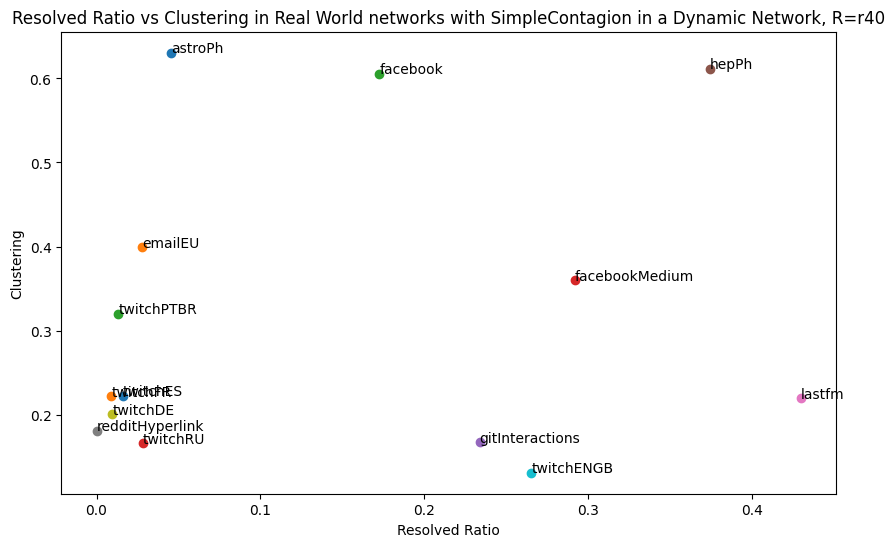

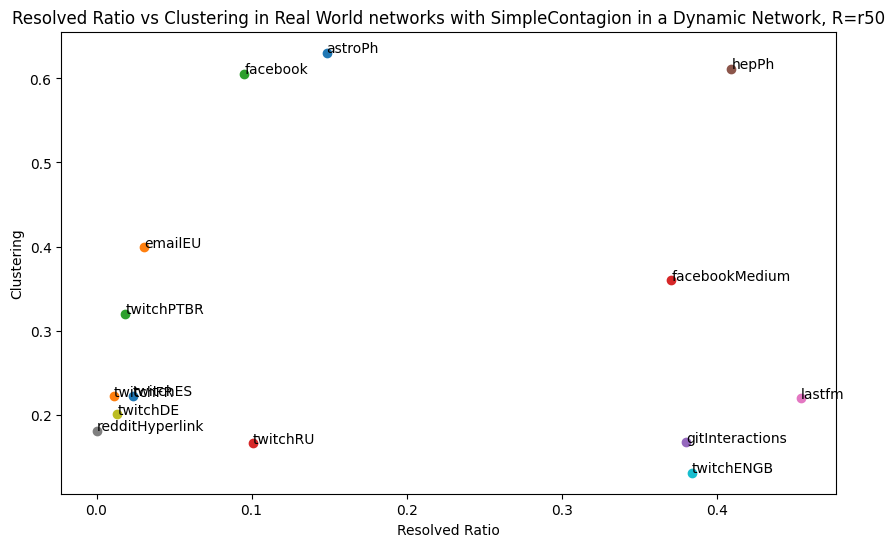

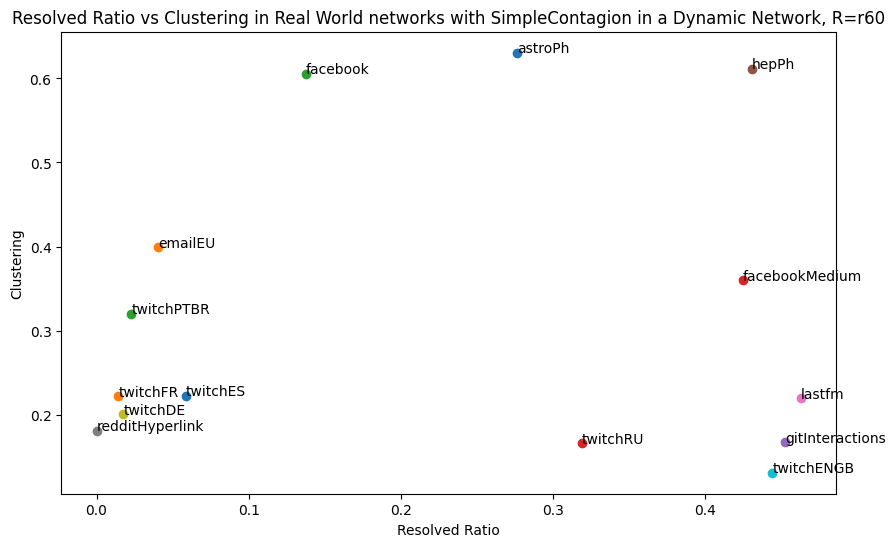

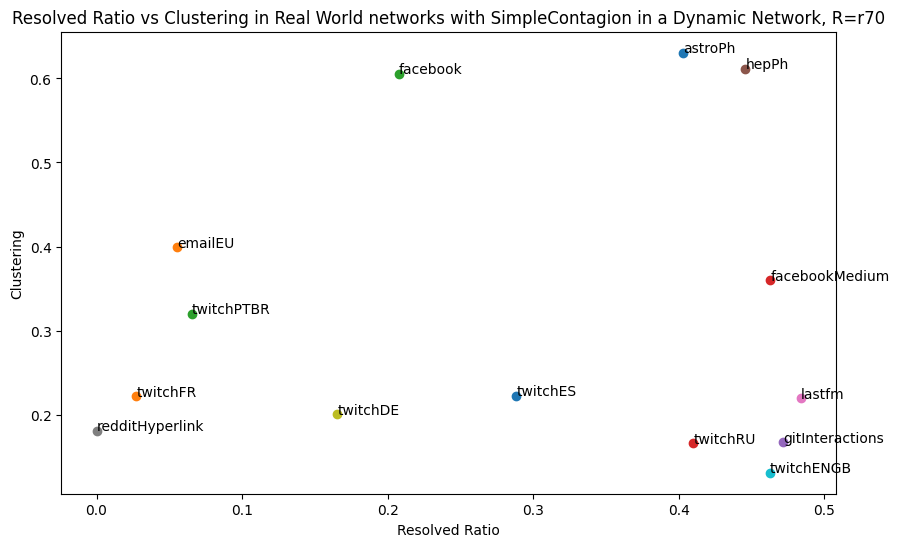

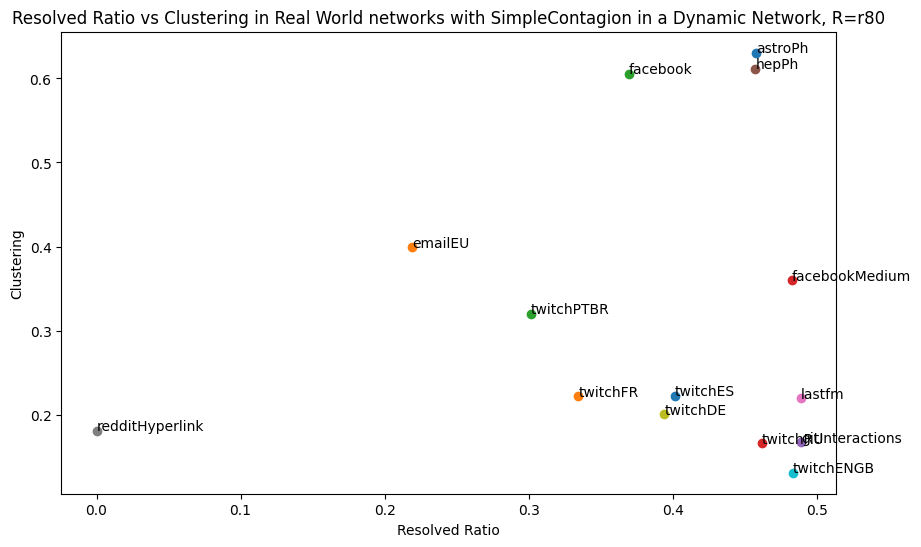

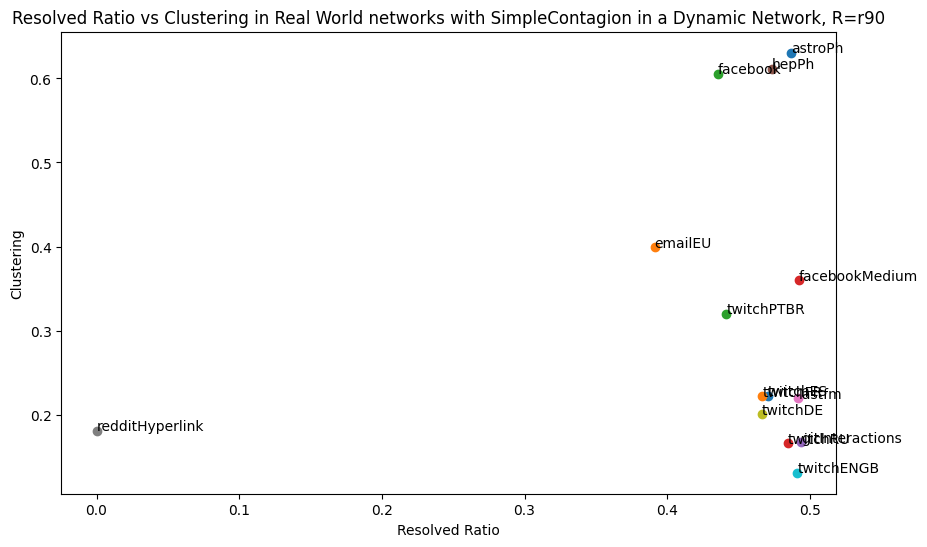

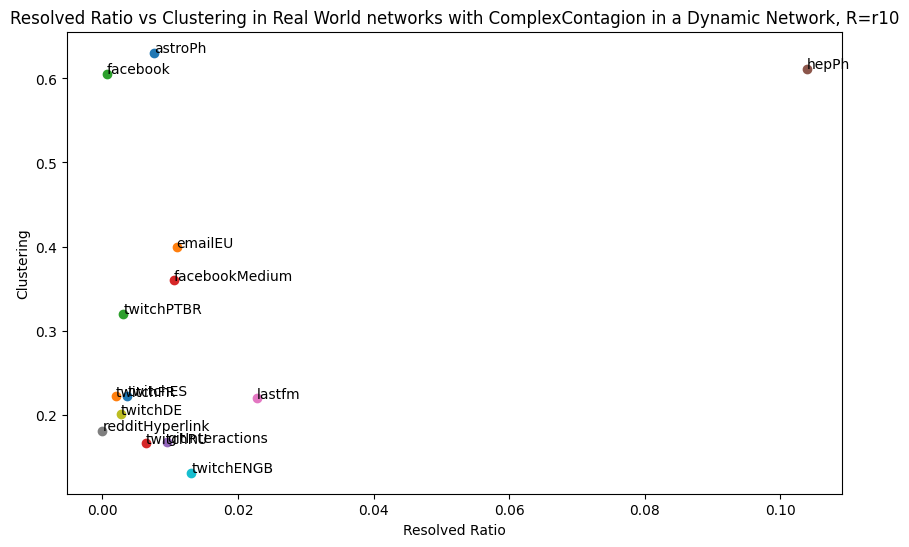

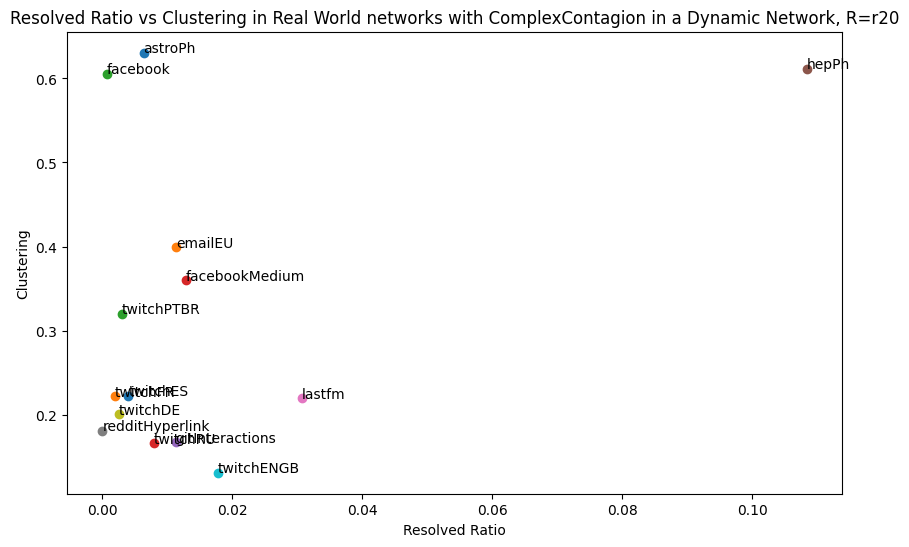

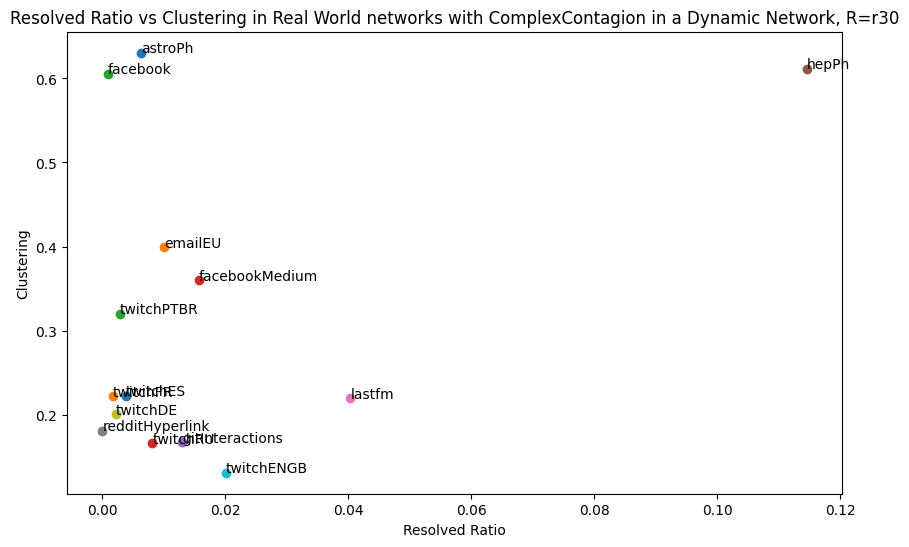

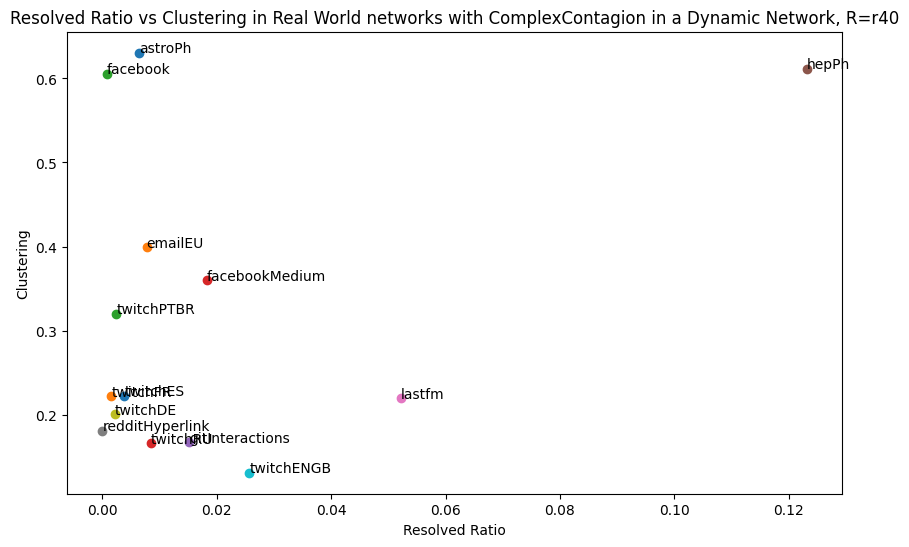

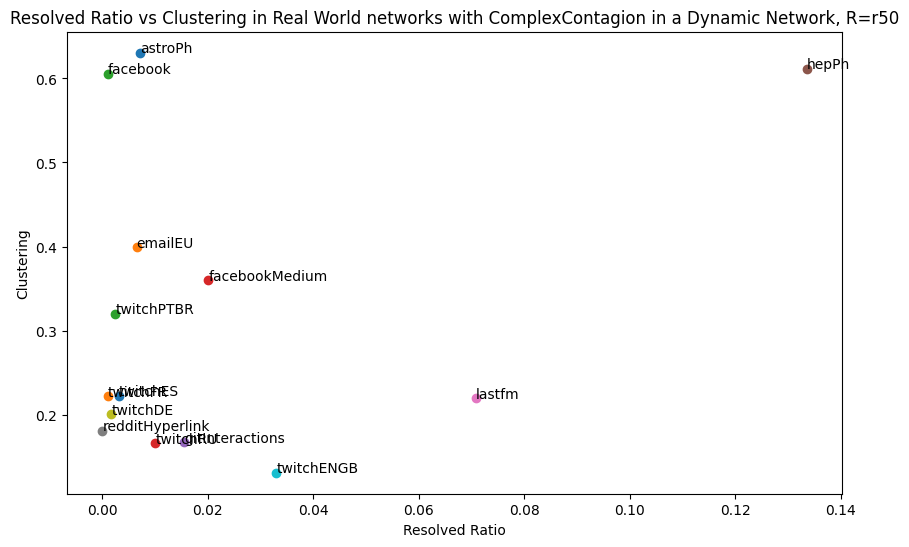

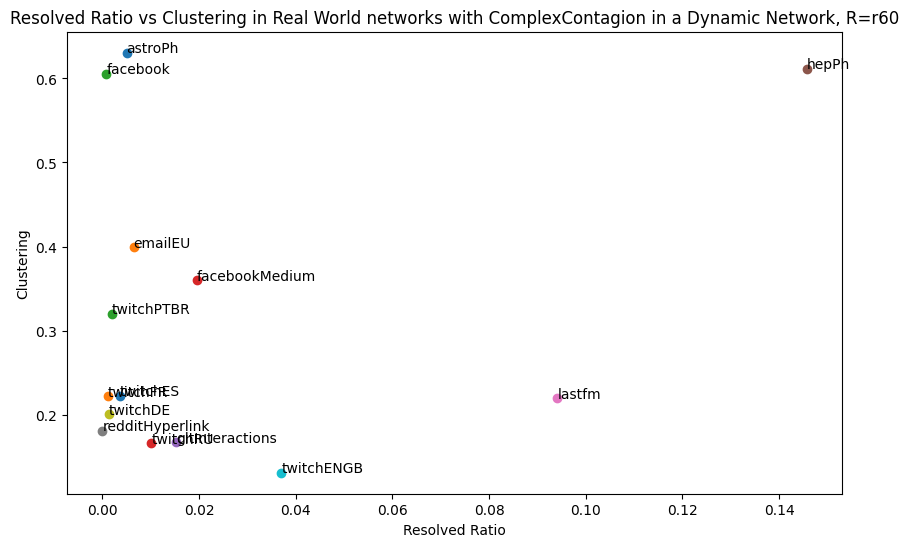

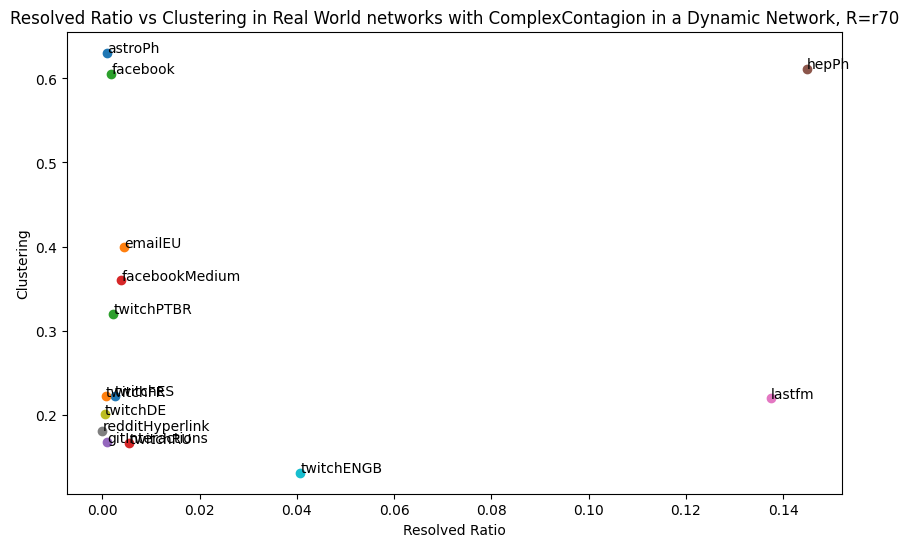

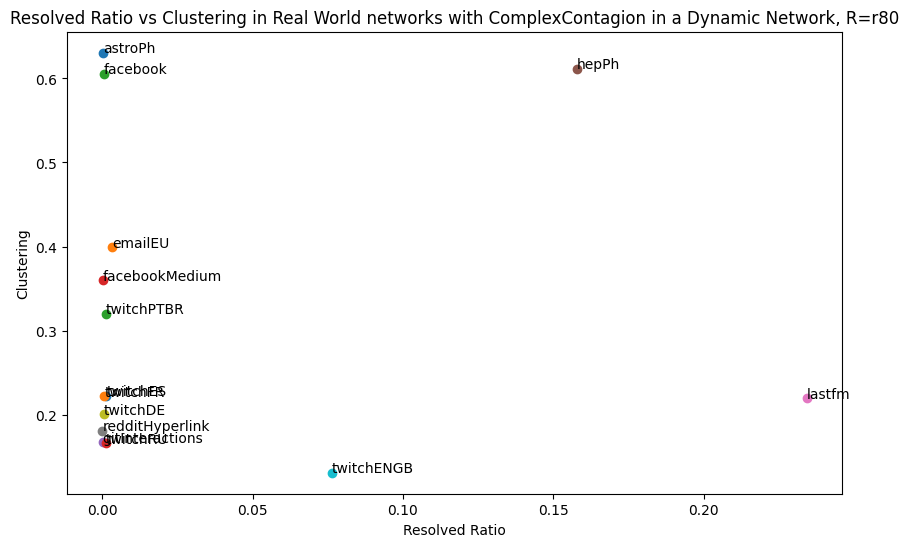

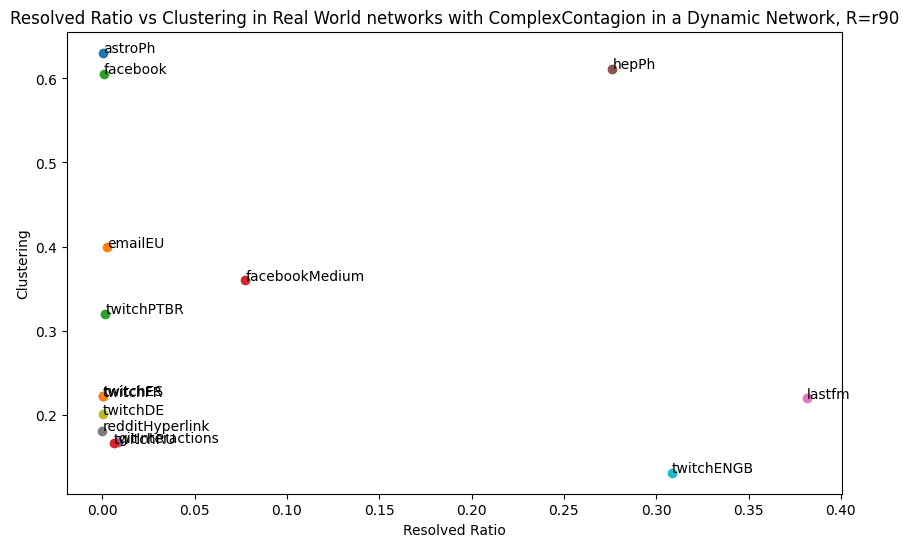

In [11]:
for contagion in contagions:
    for r in rs:
        fig=plt.figure(figsize=(10, 6))
        ax=fig.add_subplot(111)
        for dataset in datasets:
            x=sum_dict[dataset][contagion][r]
            y=dataset_cluster[dataset]
            ax.scatter(x, y)
            plt.annotate(dataset, (x, y))
        plt.title('Resolved Ratio vs Clustering in Real World networks with '+contagion+' in a Dynamic Network, R='+str(r))
        plt.xlabel("Resolved Ratio")
        plt.ylabel("Clustering")
        figpath="../../figures/RealWorld/Summary/"+contagion+"/ClusteringVsFRatio_"+r+".png"
        fig.savefig(figpath)



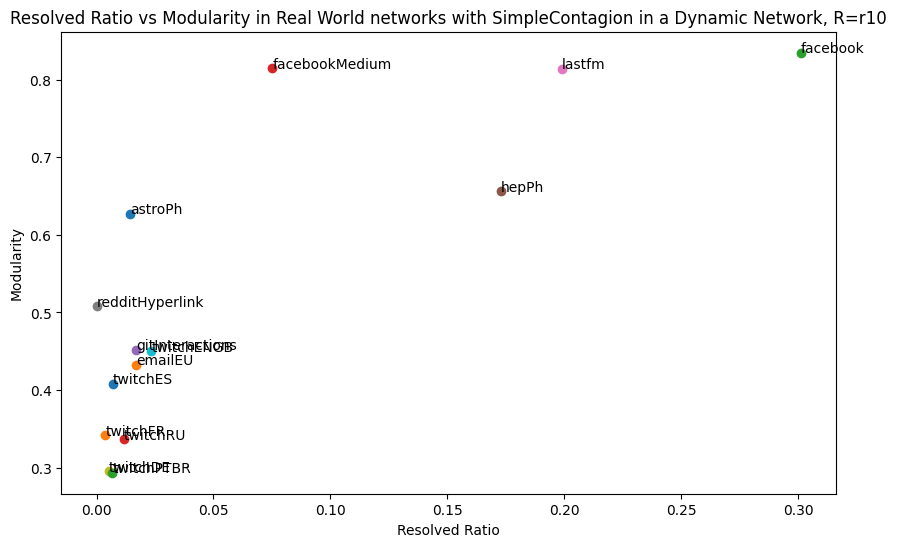

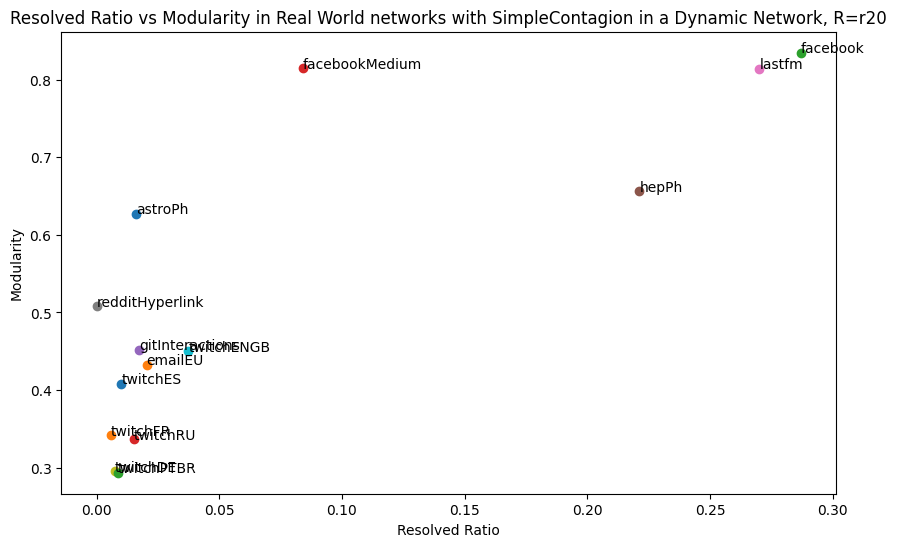

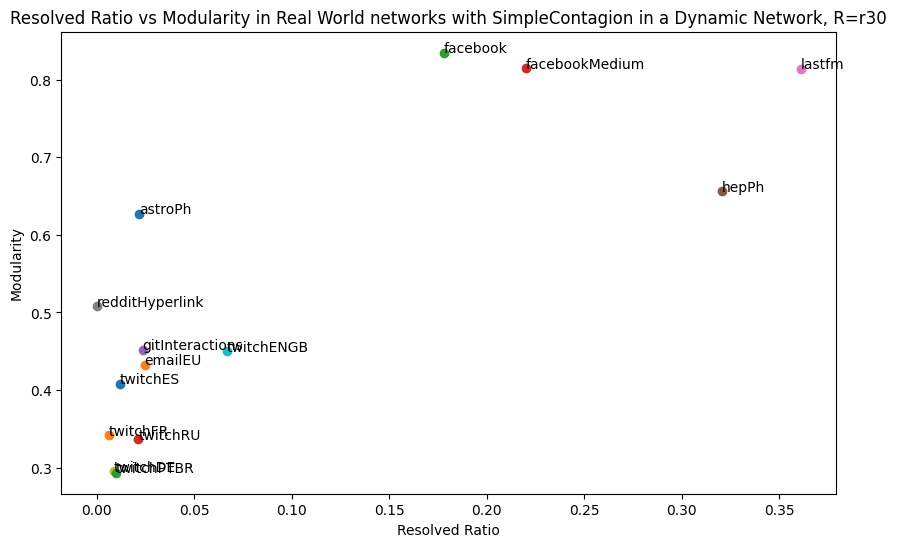

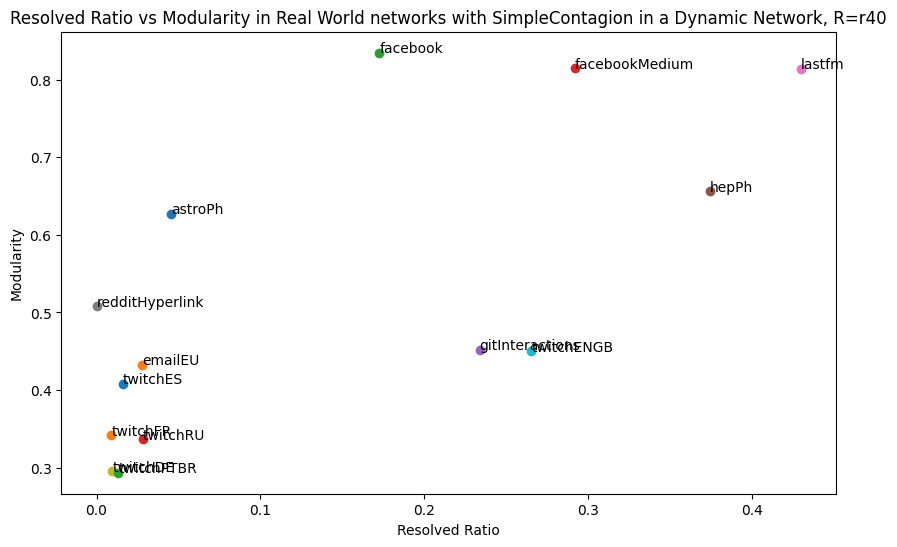

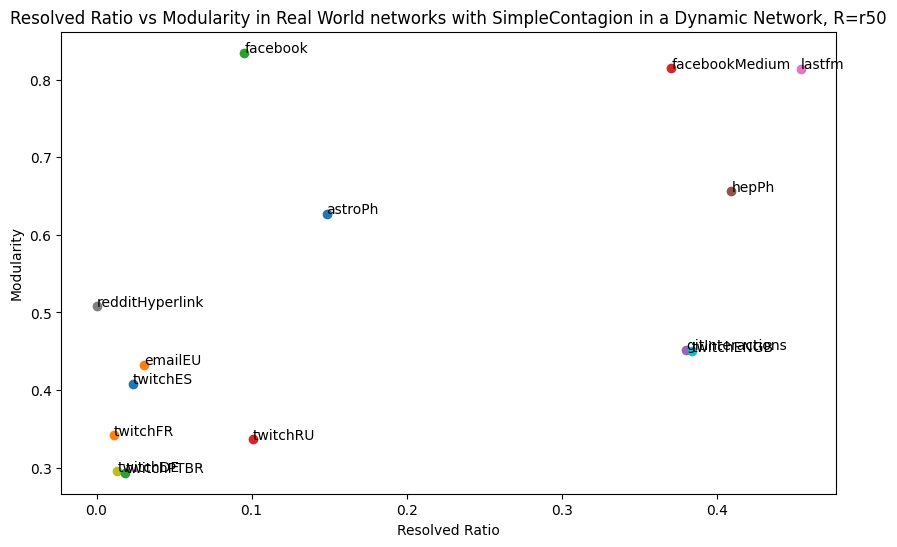

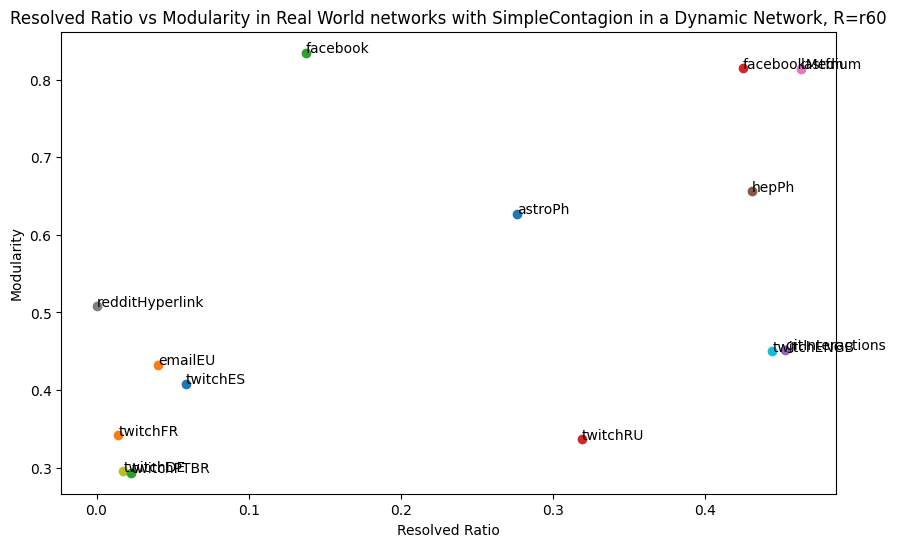

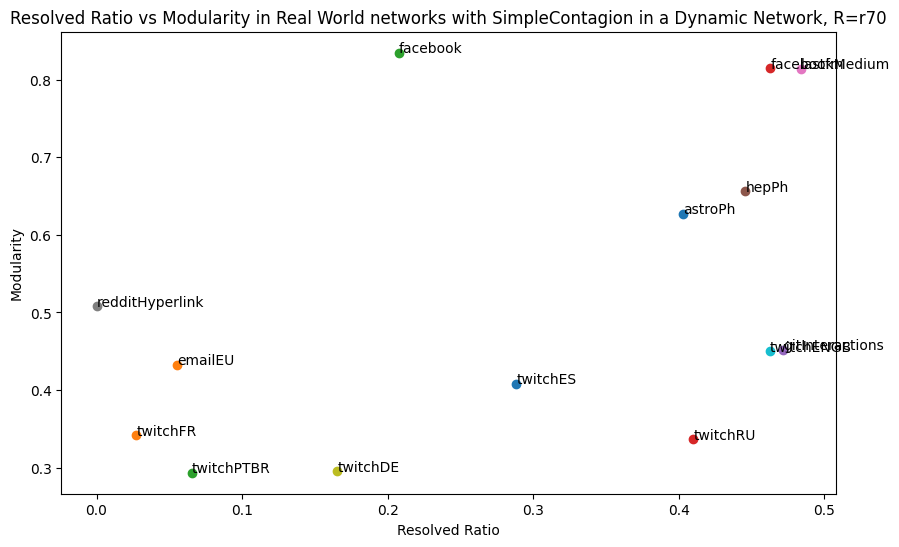

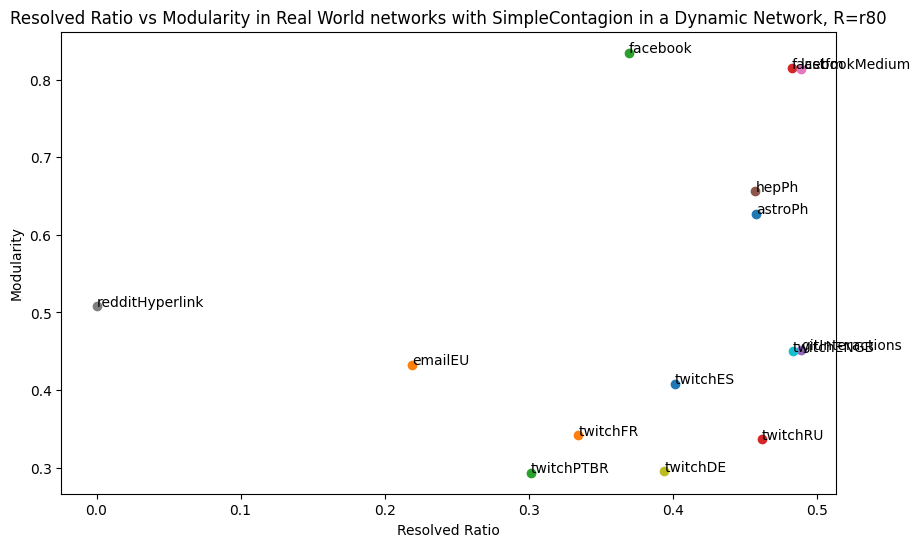

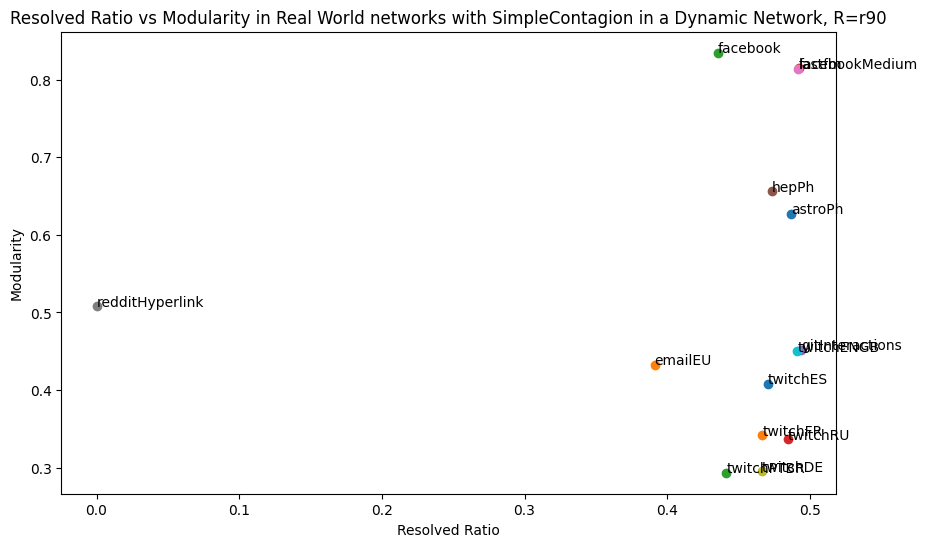

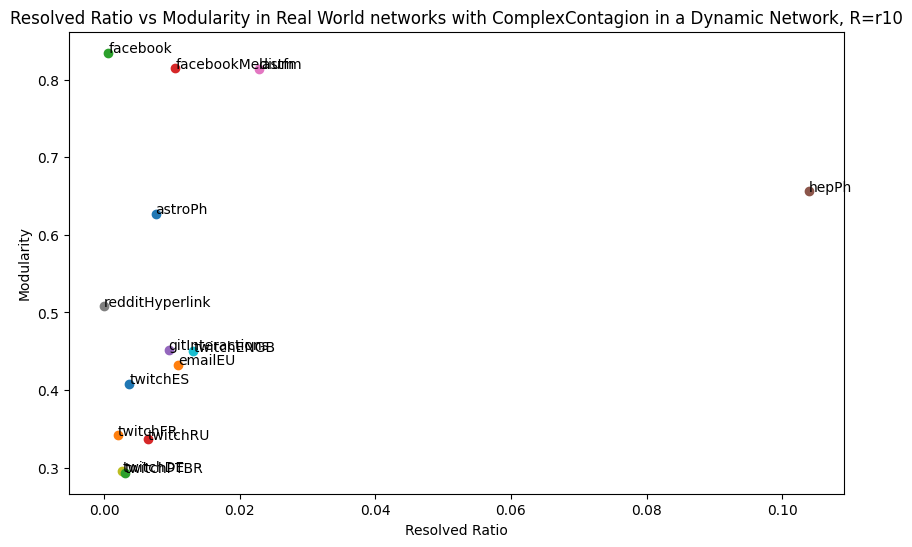

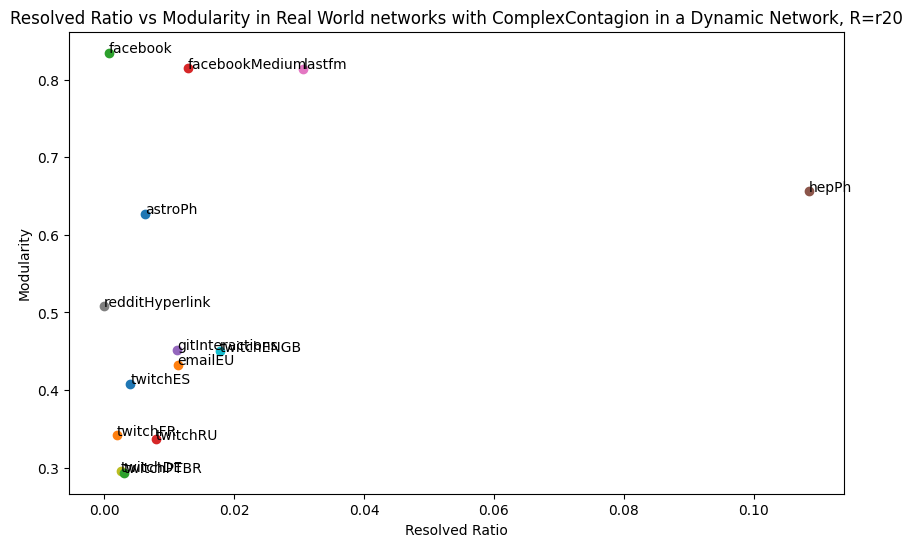

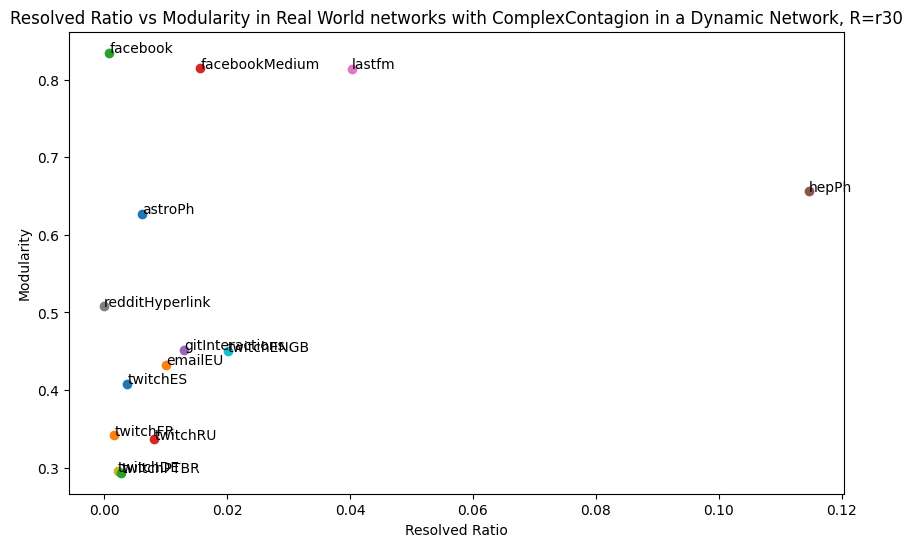

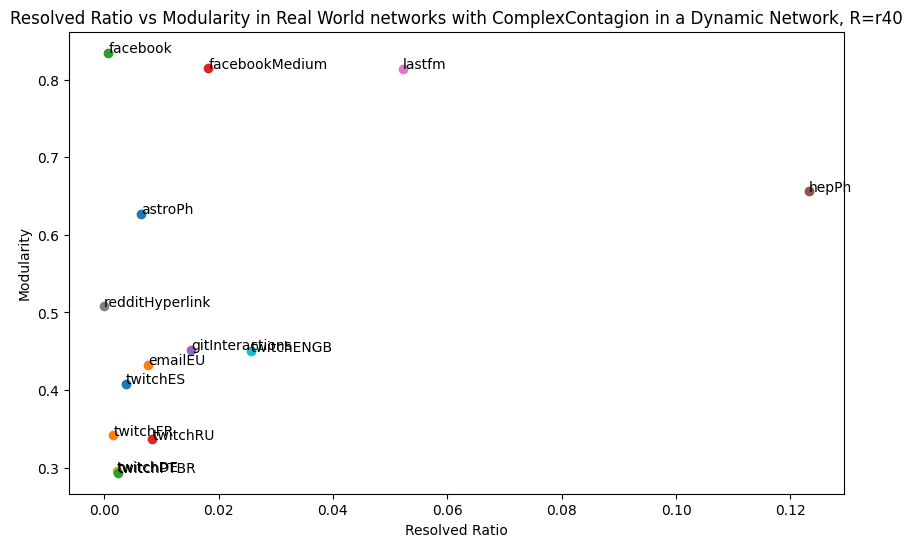

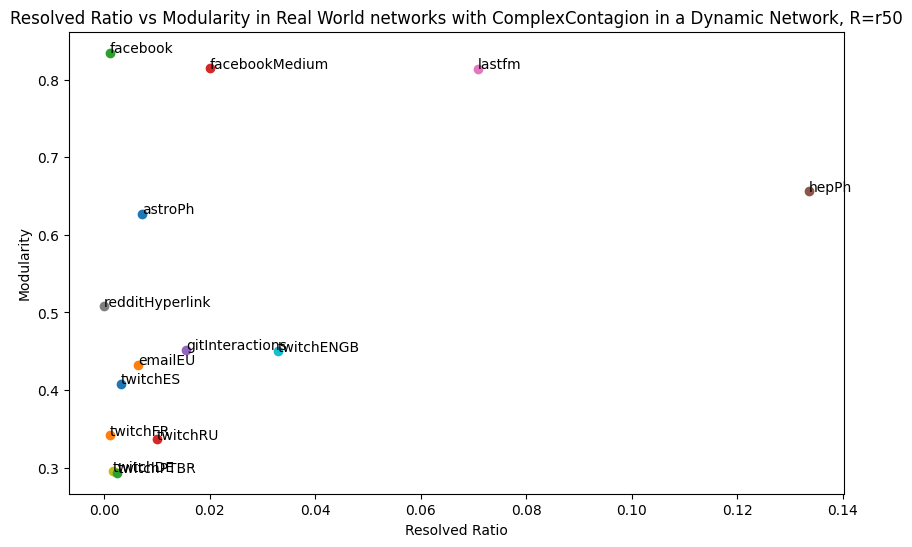

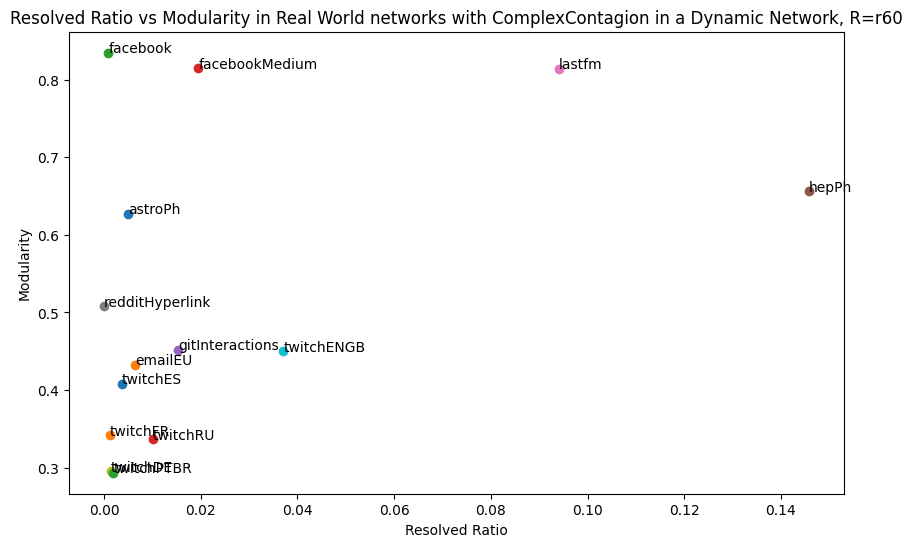

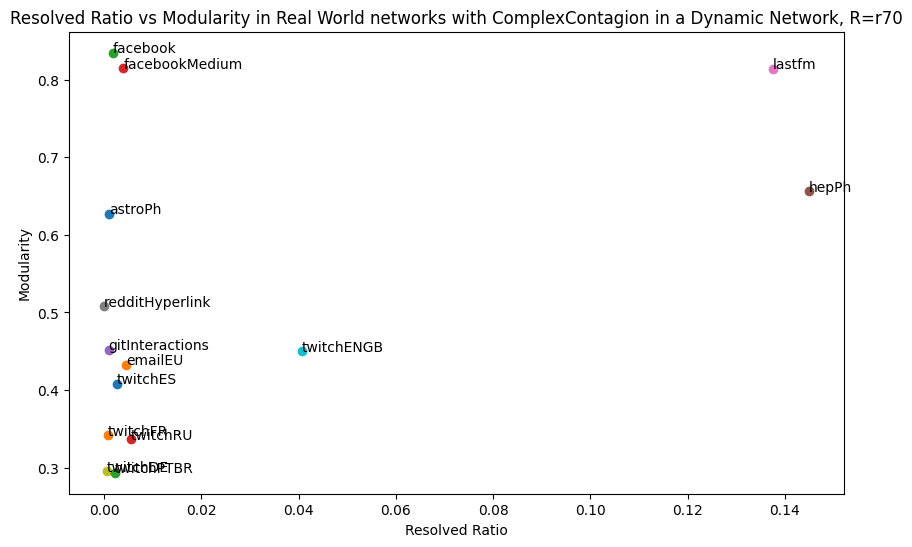

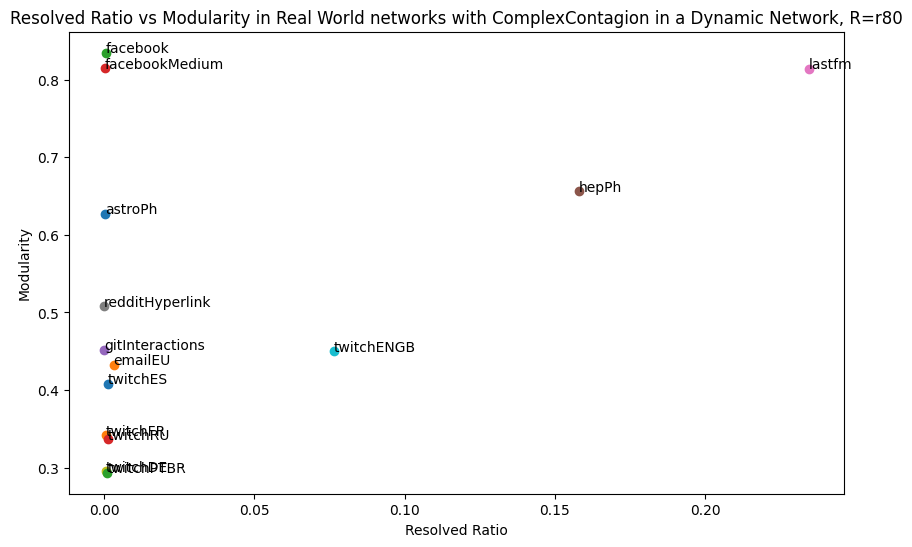

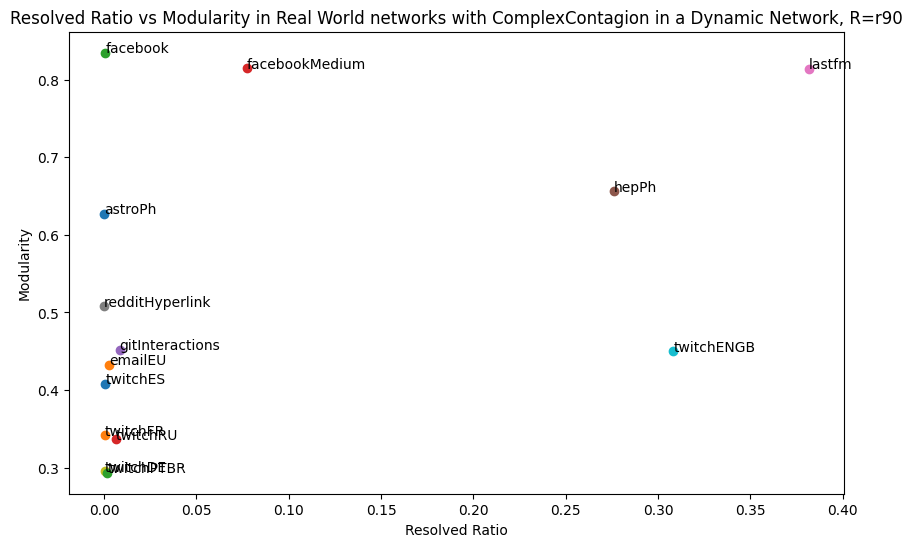

In [12]:
for contagion in contagions:
    for r in rs:
        fig=plt.figure(figsize=(10, 6))
        ax=fig.add_subplot(111)
        for dataset in datasets:
            x=sum_dict[dataset][contagion][r]
            y=dataset_modular[dataset]
            ax.scatter(x, y)
            plt.annotate(dataset, (x, y))
        
        plt.title('Resolved Ratio vs Modularity in Real World networks with '+contagion+' in a Dynamic Network, R='+str(r))
        plt.xlabel("Resolved Ratio")
        plt.ylabel("Modularity")
        figpath="../../figures/RealWorld/Summary/"+contagion+"/ModularityVsFRatio_"+r+".png"
        fig.savefig(figpath)
